# Replicating _Intermediary asset pricing: New evidence from many asset classes_
### James, Young Jin Song, Jaehwa Youm, Monica Panigrahy, and Jacob Simeral 

In [5]:
import pandas as pd
import wrds
import config
from datetime import datetime
import unittest
import matplotlib.pyplot as plt
import numpy as np
import Table_01
import Table_A1
import Table_A1_to_latex
import Table02Analysis
import Table02Prep
import Table03Load
import Table03Analysis
import Table03
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### 1. Table 01

#### 1-1 Pull the NY Fed primary dealers list from the NY Fed website

* Utilize the pull_nyfed_primary_dealers_list function, as defined in the 'load_nyfed.py' file, to download the 'nyfed_primary_dealers_list.xls' Excel file. This function saves the downloaded file into the 'data/pulled' directory.

* This process is managed by the task_pullnyfed_main() function in the 'dodo.py' file. It handles downloading the 'nyfed_primary_dealers_list.xls' Excel file and saving it in the 'data/pulled' directory.

#### 1-2 Load the NY Fed primary dealers list from the cached files in the 'data/pulled' directory

* Use the 'load_nyfed_primary_dealers_list' function to access the NY Fed primary dealers list from the cached data in the 'data/pulled' directory. Focus on the '2000s' and 'Dealer Alpha' worksheets to extract the list of primary dealers as of February 2014, aiming to replicate Table 1.

#### 1-3 Replicate Table 1 using data from the 'nyfed_primary_dealers_list.xls' Excel file

* The '2000s' worksheet provides annual listings of primary dealers from 2000 to 2014; refine this data to isolate dealers active as of February 2014.

In [ ]:
Table_01.df_2014.head()

,Primary Dealer
0,"BANK OF NOVA SCOTIA, NEW YORK AGENCY"
1,BARCLAYS CAPITAL INC.
2,BMO CAPITAL MARKETS CORP.
3,BNP PARIBAS SECURITIES CORP.
4,CANTOR FITZGERALD & CO.


* The 'Dealer Alpha' worksheet covers all primary dealers from 1960 to 2014, including their start and end dates. Clean this data to facilitate matching with the primary dealer listings found in the '2000s' worksheet."

In [ ]:
Table_01.df_dealer_alpha.head()

,Primary Dealer,Start Date,End Date
0,"ABN AMRO BANK, N.V., NY BR",2002-12-09,2006-09-15
1,ABN AMRO INCORPORATED,1998-09-29,2002-12-08
2,"AUBREY G. LANSTON & CO., INC.",1960-05-19,2000-04-17
3,"BA SECURITIES, INC.",1994-04-18,1997-09-30
4,BANC OF AMERICA SECURITIES LLC,1999-05-17,2010-11-01


* Match the 2014 primary dealer list with their start dates, taking care to handle name discrepancies across two Excel sheets, such as extra spaces or differences in punctuation.

* Also, for dealers who were active, paused, and then resumed, use their latest start date. The code should adjust for these variations to correctly align with the table in the paper. Lastly, arrange the start dates from earliest to most recent.

In [ ]:
Table_01.merged_df.head()

,Primary Dealer,Start Date
0,"GOLDMAN, SACHS & CO.",1974-12-04
1,BARCLAYS CAPITAL INC.,1998-04-01
2,HSBC SECURITIES (USA) INC.,1999-06-01
3,BNP PARIBAS SECURITIES CORP.,2000-09-15
4,DEUTSCHE BANK SECURITIES INC.,2002-03-30


* The author manually matched dealers with their publicly-traded holding companies. For the replication, a 'ticks.csv' file was created and placed in the 'data/manual' directory, containing the mapping information between primary dealers and their holding companies. Subsequently, an additional column was introduced to the 'merged_df' table to display the corresponding holding company for each dealer, utilizing the information from the 'ticks.csv' file.

In [ ]:
Table_01.merged_df_final.head()

,Primary Dealer,Holding Company,Start Date
,"GOLDMAN, SACHS & CO.","The Goldman Sachs Group, Inc.",12/4/1974
,BARCLAYS CAPITAL INC.,Barclays PLC,4/1/1998
,HSBC SECURITIES (USA) INC.,HSBC Holdings PLC,6/1/1999
,BNP PARIBAS SECURITIES CORP.,BNP Paribas Group,9/15/2000
,DEUTSCHE BANK SECURITIES INC.,Deutsche Bank AG,3/30/2002


#### 1-4 Validate adjusted primary dealer names and dates against expected results

* Ensure that 'Primary Dealer' names and 'Start Dates' in Table_01.merged_df_final, after removing spaces and periods and applying specific naming exceptions, align with expected results.

* Exceptions include adjusting 'Bank of Nova Scotia, New York Agency' to 'Bank of Nova Scotia, NY Agency' and shortening 'Merrill Lynch, Pierce, Fenner & Smith Incorporated' to 'Merrill Lynch, Pierce, Fenner & Smith'.

#### 1-5 Convert the table to LaTeX format using the to_latex() function

* The to_latex function, located in the 'Table_01_to_latex.py' file, is used to convert the 'merged_df_final' table into LaTeX format. The resulting LaTeX code is then saved into the 'Table_01_to_latex.tex' file within the output directory.

* Before converting the table to LaTeX format, replace '&' with '\\&' in company names. Since LaTeX uses '&' to recognize table columns, an unescaped '&' in company names can cause errors when generating the table in LaTeX format.

#### 1-6 Complete the LaTeX setup to replicate Table 1, incorporating the formatted table

* Use the 'Table_01_to_latex.tex' file from the 'output' directory, which contains the table in LaTeX format, to create a 'Report_Table_01.tex' file in the 'reports' directory. This action replicates the entire table. The table is inserted into 'Report_Table_01.tex' by employing the '\input{\PathToOutput/Table_01_to_latex.tex}' command.

### 2. Table A.1


#### 2-1 Load the NY Fed primary dealers list from the cached files in the 'data/pulled' directory

* Use the 'load_nyfed_primary_dealers_list' function to access the NY Fed primary dealers list from the cached data in the 'data/pulled' directory. This time, focus on the 'Dealer Alpha' worksheets to extract the list of primary dealers from 1960 to 2014, including their start and end dates, with the aim of replicating Table A.1.

#### 2-2 Replicate Table A.1 using data from the 'nyfed_primary_dealers_list.xls' Excel file

* Clean the data from the 'Dealer Alpha' worksheet to replicate Table A.1, including formatting dates and marking companies still active as primary dealers with 'Current' in the end date column, etc.

In [ ]:
Table_A1.df_dealer_alpha.head()

,Primary Dealer,Start Date,End Date
0,"ABN AMRO BANK, N.V., NY BR",12/9/2002,9/15/2006
1,ABN AMRO INCORPORATED,9/29/1998,12/8/2002
2,"AUBREY G. LANSTON & CO., INC.",5/19/1960,4/17/2000
3,"BA SECURITIES, INC.",4/18/1994,9/30/1997
4,BANC OF AMERICA SECURITIES LLC,5/17/1999,11/1/2010


#### 2-3 Convert the table to LaTeX format using the to_latex() function

* The to_latex function, found in the 'Table_A1_to_latex.py' file, is used to convert the 'df_dealer_alpha' table into LaTeX format. The resulting LaTeX code is then saved in the 'Table_A1_to_latex.tex' file within the output directory.

* As described in the Table 01 replication process, before converting the table to LaTeX format, replace '&' with '\\&' in company names. This is necessary because LaTeX uses '&' to recognize table columns, and an unescaped '&' in company names can cause errors when generating the table in LaTeX format.

* To match the format presented in Table A.1, separate the primary dealer list at the midpoint, adding a separator column for visual division

In [ ]:
Table_A1_to_latex.df_combined.head()

,Primary Dealer,Start Date,End Date,,Primary Dealer,Start Date,End Date
0,"ABN AMRO BANK, N.V., NY BR",12/9/2002,9/15/2006,,HARRIS TRUST,7/15/1965,8/31/1988
1,ABN AMRO INCORPORATED,9/29/1998,12/8/2002,,"HARRIS-NESBITT THOMSON SEC., INC.",12/31/1992,9/7/1993
2,"AUBREY G. LANSTON \& CO., INC.",5/19/1960,4/17/2000,,HSBC SECURITIES (USA) INC.,6/1/1999,Current
3,"BA SECURITIES, INC.",4/18/1994,9/30/1997,,"HSBC SECURITIES, INC.",5/9/1994,5/31/1999
4,BANC OF AMERICA SECURITIES LLC,5/17/1999,11/1/2010,,HUTTON,11/2/1977,12/31/1987


#### 2-4 Complete the LaTeX setup to replicate Table A.1, incorporating the formatted table

* To replicate the entire table in a report, use the 'Table_A1_to_latex.tex' file from the 'output' directory. Create a 'Report_Table_A1.tex' file in the 'reports' directory and insert the table by using the command '\input{\PathToOutput/Table_A1_to_latex.tex}'.

#### 2-5 Limitations on Replicating Table A.1

* While the replication closely mirrors Table A.1 in format, the list of primary dealers, and data accuracy including start and end dates, a perfect match with the original Table A.1 in the paper is not achieved for several reasons: 

* The original paper used shorter, abbreviated company names in a less consistent manner compared to Table 1, unlike the NY Fed's Excel file which provided full names.

* The author consolidated the list by combining entries that, despite name changes, continued as primary dealers. In contrast, the Excel file from the NY Fed presents a more extensive list by including all dealers, accounting for their names before and after changes, resulting in a higher number of entries.

* Due to the differences in abbreviation usage and the consolidation approach by the author, conducting precise unit testing was challenging, as the subjectivity in primary dealer name abbreviation and entry combination affected the direct comparison.

### Table 02

The following code reads in a manual data file that contains necessary information on primary dealers from 1960-2012 and then merges it with the CRSP Compustat Merge Linkhist table to get additional information on each, such as the SIC codes. The linkhist table is also used as the main reference table to pull the other comparison groups for the table.

In [6]:
db = wrds.Connection(wrds_username=config.WRDS_USERNAME)
merged_main, link_hist = Table02Prep.prim_deal_merge_manual_data_w_linktable()
merged_main

WRDS recommends setting up a .pgpass file.
Created .pgpass file successfully.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


,gvkey,conm,sic,Start Date,End Date
0,15504,ABN-AMRO HOLDINGS NV,6020,9/29/1998,9/15/2006
11,3243,CITIGROUP INC,6199,5/19/1960,4/17/2000
38,3243,CITIGROUP INC,6199,6/15/1961,Current
65,7647,BANK OF AMERICA CORP,6020,4/18/1994,9/30/1997
106,7647,BANK OF AMERICA CORP,6020,11/17/1971,4/15/1994
...,...,...,...,...,...
1791,1414,PRIMERICA INC,6311,8/22/1979,8/31/1998
1822,9577,SECURITY PACIFIC CORP,6020,12/11/1986,1/17/1991
1842,2612,CALIFORNIA FED BANCORP INC,6035,6/7/1983,8/5/1983
1855,15706,TORONTO DOMINION BANK,6020,2/11/2014,Current


As mentioned above, the next step is now to use the linkhist table to determine what the other comparison groups are. We use SIC codes to determine broker dealers and banks, and we make sure to exclude any firms that are already in the primary dealer group so we do not have duplicates. Below is the reference table for broker dealers, which had explicit SIC codes mentioned in the paper - banks did not have explicit SIC codes mentioned and required research.

In [5]:
comparison_group_link_dict = Table02Prep.create_comparison_group_linktables(link_hist, merged_main)
comparison_group_link_dict['PD']

,gvkey,conm,sic,Start Date,End Date
0,15504,ABN-AMRO HOLDINGS NV,6020,9/29/1998,9/15/2006
11,3243,CITIGROUP INC,6199,5/19/1960,4/17/2000
38,3243,CITIGROUP INC,6199,6/15/1961,Current
65,7647,BANK OF AMERICA CORP,6020,4/18/1994,9/30/1997
106,7647,BANK OF AMERICA CORP,6020,11/17/1971,4/15/1994
...,...,...,...,...,...
1791,1414,PRIMERICA INC,6311,8/22/1979,8/31/1998
1822,9577,SECURITY PACIFIC CORP,6020,12/11/1986,1/17/1991
1842,2612,CALIFORNIA FED BANCORP INC,6035,6/7/1983,8/5/1983
1855,15706,TORONTO DOMINION BANK,6020,2/11/2014,Current


We then used each of the reference tables (primary dealers, broker dealers, banks, all firms in Compustat) and pulled data from the Compustat Fundamentals Annual table. The paper mentioned use of monthly data, but there was no apparent monthly table for financial statement data from Compustat. This led to some confusion about how these authors generated their ratios - I am wondering if they computed monthly ratios given what months came out of annual and then took the average. The annuals data did come out in a strange format, however, where it seemed like there was data for several months of the year with disproportionate amounts in each month. The quarterly dataset was not used because it did not appear to have the same gvkey compatibility as the annual table.

![title](img/table02_annuals_dataset.png)

Below is the dataset for broker dealers. We calculate or directly pull the values we need in our query so we don't need to do it after. It was mentioned in class this was a best practice because it would run on WRDS servers.

In [6]:
datasets = Table02Prep.pull_data_for_all_comparison_groups(db, comparison_group_link_dict)
datasets['PD']

,datadate,total_assets,book_debt,book_equity,market_equity,gvkey,conm
0,1998-12-31,503934.903,487312.516,12505.425,31278.675000,015504,ABN-AMRO HOLDINGS NV
1,1999-12-31,461089.000,444038.000,12071.000,37162.800000,015504,ABN-AMRO HOLDINGS NV
2,2000-12-31,509927.000,493207.000,11757.000,34177.370500,015504,ABN-AMRO HOLDINGS NV
3,2001-12-31,531713.000,517166.000,10492.000,24997.940000,015504,ABN-AMRO HOLDINGS NV
4,2002-12-31,582984.873,567686.209,11303.879,25655.008000,015504,ABN-AMRO HOLDINGS NV
...,...,...,...,...,...,...,...
4,1997-12-31,88540.188,81518.000,7022.199,29396.486250,008007,WELLS FARGO & CO
5,1998-12-31,202475.000,181716.000,20759.000,65659.566375,008007,WELLS FARGO & CO
6,1999-12-31,218102.000,195971.000,22131.000,65785.706438,008007,WELLS FARGO & CO
7,2000-12-31,272426.000,245938.000,26488.000,95484.349125,008007,WELLS FARGO & CO


We then prep that data further by aggregating by year and standardizing the date to the first of the year. We also convert the datadate to a datetime column that can be sliced.

In [7]:
prepped_datasets = Table02Prep.prep_datasets(datasets)
prepped_datasets['Banks']

,datadate,total_assets,book_debt,book_equity,market_equity
0,1960-01-01,7.515993e+04,3.841206e+04,6071.847,0.000000e+00
1,1961-01-01,8.230766e+04,3.958452e+04,6540.672,0.000000e+00
2,1962-01-01,8.833427e+04,4.502994e+04,6895.387,1.049351e+04
3,1963-01-01,1.219723e+05,1.114317e+05,9300.422,1.182642e+04
4,1964-01-01,1.363716e+05,1.248879e+05,10018.281,1.247930e+04
5,1965-01-01,1.521872e+05,1.397237e+05,10746.259,1.151586e+04
6,1966-01-01,1.655932e+05,1.518739e+05,11307.324,1.306373e+04
7,1967-01-01,1.915728e+05,1.765848e+05,12128.945,1.438679e+04
8,1968-01-01,2.163426e+05,2.002108e+05,13029.328,2.086249e+04
9,1969-01-01,2.396760e+05,2.224958e+05,14334.997,1.964492e+04


We then weave in some of our analysis into the process, whenever the necessary dataset for the analysis is first available. Below is our main table of ratios, where we have computed the
$$
\frac{\text{Primary dealers amount}}{\text{Comparison group amount (less PD) + Primary dealers amount}}
$$

In [8]:
Table02Analysis.create_summary_stat_table_for_data(datasets)
table = Table02Prep.create_ratios_for_table(prepped_datasets)
table

,total_assets_BD,book_debt_BD,book_equity_BD,market_equity_BD,total_assets_Banks,book_debt_Banks,book_equity_Banks,market_equity_Banks,total_assets_Cmpust.,book_debt_Cmpust.,book_equity_Cmpust.,market_equity_Cmpust.,Period
datadate,,,,,,,,,,,,,
1960-01-01,0.994757,0.996001,1.000000,NaN,0.140385,0.165996,0.145801,NaN,0.031971,0.057844,0.084328,0.000000,1960-2012
1961-01-01,0.994551,0.995342,1.000000,1.000000,0.142919,0.177522,0.142709,1.000000,0.032679,0.048629,0.028546,0.050405,1960-2012
1962-01-01,0.960115,0.942576,0.980093,1.000000,0.139781,0.163534,0.142141,0.188113,0.031126,0.044425,0.018469,0.007528,1960-2012
1963-01-01,0.961861,0.960954,0.986783,1.000000,0.114348,0.110362,0.158578,0.174051,0.029983,0.049020,0.010599,0.006545,1960-2012
1964-01-01,0.970309,0.969816,0.989365,1.000000,0.146532,0.143243,0.180582,0.213996,0.039711,0.064672,0.011767,0.007484,1960-2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-01-01,0.988118,0.988940,0.974278,0.949269,0.651731,0.657129,0.552204,0.450868,0.310649,0.352854,0.088010,0.032344,1990-2012
2009-01-01,0.985530,0.986542,0.969728,0.961018,0.611995,0.614747,0.573490,0.547569,0.282737,0.324274,0.093529,0.049301,1990-2012
2010-01-01,0.985386,0.986343,0.971153,0.958730,0.625092,0.628888,0.571621,0.539365,0.274330,0.314789,0.093174,0.045699,1990-2012


We create a figure that can give the reader insight into how the ratios have shifted over time for each category and comparison group. We had to clean some of the data and fill null values to have the graph look reasonable but without changing the overall shape of it too dramatically.

Lastly, we get our final table which was what we were trying to replicate from the paper. This table is then converted to LaTeX and outputted to a .tex file.

In [10]:
formatted_table = Table02Prep.format_final_table(table)
formatted_table

Metric    Total assets                     Book debt                      \
Source              BD     Banks   Cmpust.        BD     Banks   Cmpust.   
Period                                                                     
1960-2012     0.905254  0.328967  0.119626  0.904850  0.331127  0.145254   
1960-1990     0.902443  0.189391  0.053495  0.902264  0.189797  0.073100   
1990-2012     0.906469  0.516800  0.207932  0.905580  0.521165  0.241427   

Metric    Book equity                     Market equity                      
Source             BD     Banks   Cmpust.            BD     Banks   Cmpust.  
Period                                                                       
1960-2012    0.908294  0.319144  0.035655      0.903077  0.351491  0.024603  
1960-1990    0.899557  0.224465  0.017193      0.872328  0.277292  0.013032  
1990-2012    0.920375  0.447867  0.060320      0.943962  0.448443  0.040139

Loading library list...
Done


Metric    Total assets                     Book debt                      \
Source              BD     Banks   Cmpust.        BD     Banks   Cmpust.   
Period                                                                     
1960-2024     0.918636  0.374005  0.140897  0.918419  0.376174  0.168007   
1960-1990     0.902443  0.189391  0.053127  0.902264  0.189797  0.072512   
1990-2024     0.931266  0.540808  0.219708  0.930886  0.544477  0.253636   

Metric    Book equity                     Market equity                      
Source             BD     Banks   Cmpust.            BD     Banks   Cmpust.  
Period                                                                       
1960-2024    0.919675  0.361316  0.045865      0.911581  0.386589  0.027210  
1960-1990    0.899557  0.224465  0.017137      0.872328  0.277292  0.013028  
1990-2024    0.937890  0.485604  0.071607      0.946492  0.482110  0.040023

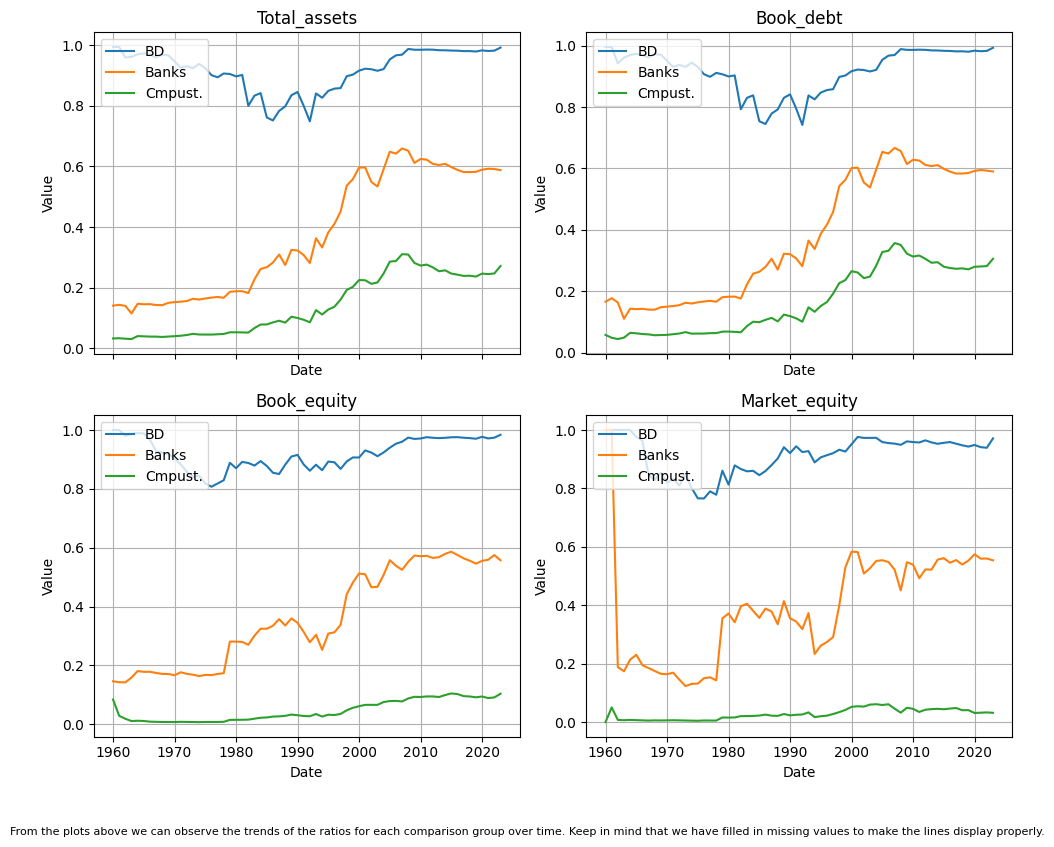

In [11]:
updated_table = Table02Prep.main(UPDATED=True)
updated_table

### Table 03

#### 3.1 Pull the quarterly dataset for primary dealers
- 

In [6]:
db = wrds.Connection(wrds_username=config.WRDS_USERNAME)
prim_dealers, _ = Table02Prep.prim_deal_merge_manual_data_w_linktable()
dataset, _ = Table03Load.fetch_data_for_tickers(prim_dealers, db)    
dataset

WRDS recommends setting up a .pgpass file.
Created .pgpass file successfully.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


,datafqtr,total_assets,book_debt,book_equity,market_equity,gvkey,conm
0,1993Q3,53855.500,50158.000,3697.500,8450.487500,008007,WELLS FARGO & CO
1,1993Q4,54665.000,50904.098,3760.900,7490.413125,008007,WELLS FARGO & CO
2,1994Q1,55328.199,51474.898,3853.300,7518.237500,008007,WELLS FARGO & CO
3,1994Q2,55756.797,51920.199,3836.600,8241.314125,008007,WELLS FARGO & CO
4,1994Q3,56565.398,52741.098,3824.300,7746.898500,008007,WELLS FARGO & CO
...,...,...,...,...,...,...,...
28,2005Q3,1084338.560,1056726.945,25221.719,45031.200000,015504,ABN-AMRO HOLDINGS NV
29,2005Q4,1043048.097,1014447.298,26314.109,49088.828800,015504,ABN-AMRO HOLDINGS NV
30,2006Q1,1183661.751,1152907.595,28293.581,56132.568000,015504,ABN-AMRO HOLDINGS NV
31,2006Q2,1260032.402,1228193.523,29329.083,51765.120000,015504,ABN-AMRO HOLDINGS NV


#### 3.2 Prepare the dealers dataset and macro data 
- 

In [7]:
prep_datast = Table03.prep_dataset(dataset)
prep_datast

/Users/youmjaehwa/Documents/GitHub/intermediary-asset-pricing/src/Table03.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['datafqtr'] = dataset['datafqtr'].apply(quarter_to_date)


Extracted ltab127d.prn to /Users/youmjaehwa/Documents/GitHub/intermediary-asset-pricing/data/pulled/ltab127d.prn


,datafqtr,total_assets,book_debt,book_equity,market_equity,bd_fin_assets,bd_liabilities
27,1968-12-31,3.741944e+04,3.481365e+04,2122.177,3.444952e+03,18513.0,17690.00
28,1969-03-31,3.721361e+04,3.456163e+04,2159.931,4.259531e+03,14615.0,13739.00
29,1969-06-30,4.005242e+04,3.736821e+04,2185.974,4.072002e+03,15847.0,14953.00
30,1969-09-30,3.874646e+04,3.600532e+04,2231.967,3.988090e+03,12890.0,12030.00
31,1969-12-31,4.106946e+04,3.829460e+04,2972.315,3.941637e+03,15402.0,14553.00
...,...,...,...,...,...,...,...
199,2011-12-31,2.262210e+07,2.121732e+07,1316360.323,8.390006e+05,1949702.0,1870911.00
200,2012-03-31,2.075195e+07,1.942295e+07,1244562.166,1.056701e+06,2063829.0,1978049.00
201,2012-06-30,2.327922e+07,2.183596e+07,1355057.377,9.129659e+05,2052880.0,1967675.00
202,2012-09-30,2.326043e+07,2.179815e+07,1375772.056,9.968280e+05,2048823.0,1957817.00


In [8]:
macro_dataset = Table03.macro_variables(db)
macro_dataset

Loaded data from cache.
Loading data from cache.


,cape,e/p,unemp_rate,nfci,real_gdp,real_gdp_growth,mkt_ret,mkt_vol
1969-03-31,20.185412,0.049685,3.400000,NaN,5283.597,6.4,0.0264,6.054025
1969-06-30,20.371403,0.049120,3.433333,NaN,5299.625,1.2,-0.0718,7.987528
1969-09-30,18.503090,0.054048,3.566667,NaN,5334.600,2.7,-0.0298,0.929831
1969-12-31,17.882345,0.055975,3.566667,NaN,5308.556,-1.9,-0.0263,1.550438
1970-03-31,16.264751,0.061616,4.166667,NaN,5300.652,-0.6,-0.0106,2.421339
...,...,...,...,...,...,...,...,...
2022-12-31,28.347925,0.035276,3.566667,-0.178484,21989.981,2.6,-0.0641,0.957927
2023-03-31,28.494130,0.035101,3.500000,-0.257934,22112.329,2.2,0.0251,0.467478
2023-06-30,29.155483,0.034311,3.566667,-0.231994,22225.350,2.1,0.0646,53.839262
2023-09-30,30.331867,0.032976,3.700000,-0.329642,22490.692,4.9,-0.0524,1.451159


#### 3.3 Calculate the Capital ratios and factors 
- 

In [9]:
ratio_dataset = Table03.aggregate_ratios(prep_datast)
ratio_dataset

/Users/youmjaehwa/Documents/GitHub/intermediary-asset-pricing/src/Table03.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'datafqtr': 'date'}, inplace=True)


,market_cap_ratio,book_cap_ratio,aem_leverage_ratio
date,,,
1968-12-31,0.090044,0.057456,0.044455
1969-03-31,0.109722,0.058819,0.059938
1969-06-30,0.098262,0.055265,0.056414
1969-09-30,0.099719,0.058371,0.066718
1969-12-31,0.093324,0.072027,0.055123
...,...,...,...
2011-12-31,0.038039,0.058417,0.040412
2012-03-31,0.051598,0.060218,0.041564
2012-06-30,0.040132,0.058430,0.041505


In [10]:
factors_dataset = Table03.convert_ratios_to_factors(ratio_dataset)
factors_dataset

/Users/youmjaehwa/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/Users/youmjaehwa/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


,market_capital_factor,book_capital_factor,aem_leverage_factor
date,,,
1968-12-31,NaN,NaN,0.013300
1969-03-31,0.239624,0.019846,0.295879
1969-06-30,-0.054209,-0.061414,-0.045452
1969-09-30,0.049502,0.047382,0.208414
1969-12-31,-0.027277,0.232007,-0.160500
...,...,...,...
2011-12-31,-0.198856,0.005098,-0.079176
2012-03-31,0.155319,0.028996,-0.023909
2012-06-30,-0.322227,-0.027858,0.011935


#### 3.4 Create Panel data 
- 


In [11]:
panelA = Table03.create_panelA(ratio_dataset, macro_dataset)
panelA

,Market capital,Book capital,AEM leverage,E/P,Unemployment,Financial conditions,GDP,Market excess return,Market volatility
1970-03-31,0.097045,0.054034,0.060133,0.061616,4.166667,NaN,5300.652,-0.0106,2.421339
1970-06-30,0.083692,0.055080,0.063453,0.068992,4.766667,NaN,5308.164,-0.0579,12.452839
1970-09-30,0.086464,0.054470,0.054294,0.070382,5.166667,NaN,5357.077,0.0418,1.314768
1970-12-31,0.088236,0.075795,0.045365,0.064941,5.833333,NaN,5299.672,0.0572,2.000585
1971-03-31,0.091724,0.068942,0.051410,0.059445,5.933333,0.893634,5443.619,0.0413,1.216783
...,...,...,...,...,...,...,...,...,...
2011-12-31,0.038039,0.058417,0.040412,0.048938,8.633333,-0.037502,17222.583,0.0074,0.647398
2012-03-31,0.051598,0.060218,0.041564,0.046177,8.266667,-0.342313,17367.010,0.0311,8.110201
2012-06-30,0.040132,0.058430,0.041505,0.047445,8.200000,-0.298552,17444.525,0.0389,5.797123
2012-09-30,0.043730,0.059367,0.044419,0.046744,8.033333,-0.399320,17469.650,0.0273,1.165194


In [12]:
panelB = Table03.create_panelB(factors_dataset, macro_dataset)
panelB

/Users/youmjaehwa/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Users/youmjaehwa/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,Market capital factor,Book capital factor,AEM leverage factor,E/P growth,Unemployment growth,Financial conditions growth,GDP growth,Market excess return,Market volatility growth
1970-03-31,0.066669,-0.228475,0.038488,0.096007,0.155485,0.000000,-0.001490,-0.0106,0.445783
1970-06-30,-0.104785,0.007576,0.068547,0.113078,0.134531,0.000000,0.001416,-0.0579,1.637628
1970-09-30,0.041879,-0.020332,-0.118576,0.019940,0.080580,0.000000,0.009172,0.0418,-2.248289
1970-12-31,0.034848,0.380800,-0.151154,-0.080446,0.121361,0.000000,-0.010774,0.0572,0.419780
1971-03-31,0.057283,-0.064141,0.080838,-0.088430,0.016998,0.000000,0.026799,0.0413,-0.497229
...,...,...,...,...,...,...,...,...,...
2011-12-31,-0.198856,0.005098,-0.079176,0.013342,-0.041594,-1.850894,0.011168,0.0074,-0.088938
2012-03-31,0.155319,0.028996,-0.023909,-0.058080,-0.043399,2.211344,0.008351,0.0311,2.527916
2012-06-30,-0.322227,-0.027858,0.011935,0.027098,-0.008097,-0.136783,0.004453,0.0389,-0.335761
2012-09-30,-0.091402,0.014232,0.095965,-0.014881,-0.020535,0.290821,0.001439,0.0273,-1.604474


#### 3.5 Calculate correlations
- 


In [13]:
correlation_panelA = Table03.calculate_correlation_panelA(panelA)
correlation_panelA

,Market capital,Book capital,AEM leverage
Market capital,1.000000,0.442542,-0.099165
Book capital,NaN,1.000000,0.482033
AEM leverage,NaN,NaN,1.000000
E/P,-0.192468,0.573962,0.756728
Unemployment,-0.187025,0.472442,0.311066
GDP,-0.092817,-0.490614,-0.712432
Financial conditions,-0.258262,0.303528,0.431175
Market volatility,-0.041961,0.063726,0.110137


In [14]:
correlation_panelB = Table03.calculate_correlation_panelB(panelB)
correlation_panelB

,Market capital factor,Book capital factor,AEM leverage factor
Market capital factor,1.000000,0.442821,-0.112960
Book capital factor,NaN,1.000000,0.103306
AEM leverage factor,NaN,NaN,1.000000
Market excess return,0.143754,0.141635,-0.017040
E/P growth,-0.350464,-0.005913,0.275384
Unemployment growth,0.004609,0.094297,0.109715
GDP growth,-0.038515,-0.082256,-0.108393
Financial conditions growth,-0.127194,0.019796,0.092997
Market volatility growth,-0.092930,0.045884,-0.105917


WRDS recommends setting up a .pgpass file.
Created .pgpass file successfully.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


/Users/youmjaehwa/Documents/GitHub/intermediary-asset-pricing/src/Table03.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['datafqtr'] = dataset['datafqtr'].apply(quarter_to_date)


Extracted ltab127d.prn to /Users/youmjaehwa/Documents/GitHub/intermediary-asset-pricing/data/pulled/ltab127d.prn
Cache not found, pulling data...
Data pulled and saved to /Users/youmjaehwa/Documents/GitHub/intermediary-asset-pricing/data/pulled/fred_bd.parquet
Loaded data from cache.
Loading data from cache.


/Users/youmjaehwa/Documents/GitHub/intermediary-asset-pricing/src/Table03.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'datafqtr': 'date'}, inplace=True)
/Users/youmjaehwa/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/Users/youmjaehwa/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/Users/youmjaehwa/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/

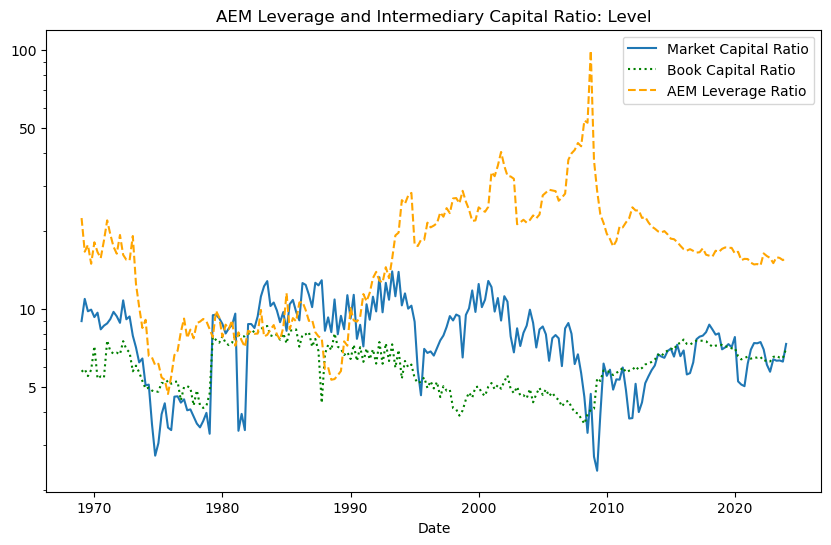

In [16]:
import Table03
Table03.main(UPDATED=True)